<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#第5章-Logistics回归" data-toc-modified-id="第5章-Logistics回归-1">第5章 Logistics回归</a></span><ul class="toc-item"><li><span><a href="#Logistic回归一般过程" data-toc-modified-id="Logistic回归一般过程-1.1">Logistic回归一般过程</a></span></li><li><span><a href="#Logistic回归" data-toc-modified-id="Logistic回归-1.2">Logistic回归</a></span></li><li><span><a href="#基于最优化方法的最佳回归系数确定" data-toc-modified-id="基于最优化方法的最佳回归系数确定-1.3">基于最优化方法的最佳回归系数确定</a></span><ul class="toc-item"><li><span><a href="#梯度上升算法" data-toc-modified-id="梯度上升算法-1.3.1">梯度上升算法</a></span></li><li><span><a href="#梯度上升法的思想" data-toc-modified-id="梯度上升法的思想-1.3.2">梯度上升法的思想</a></span></li><li><span><a href="#训练算法：使用梯度上升找到最佳参数" data-toc-modified-id="训练算法：使用梯度上升找到最佳参数-1.3.3">训练算法：使用梯度上升找到最佳参数</a></span></li></ul></li><li><span><a href="#代码实现" data-toc-modified-id="代码实现-1.4">代码实现</a></span></li><li><span><a href="#2.画出数据集最佳拟合直线" data-toc-modified-id="2.画出数据集最佳拟合直线-1.5">2.画出数据集最佳拟合直线</a></span></li><li><span><a href="#注意" data-toc-modified-id="注意-1.6">注意</a></span></li><li><span><a href="#4.改进的随机梯度上升算法" data-toc-modified-id="4.改进的随机梯度上升算法-1.7">4.改进的随机梯度上升算法</a></span></li><li><span><a href="#5.用Logistic回归进行分类" data-toc-modified-id="5.用Logistic回归进行分类-1.8">5.用Logistic回归进行分类</a></span></li><li><span><a href="#摘要" data-toc-modified-id="摘要-1.9">摘要</a></span></li><li><span><a href="#Logistic回归" data-toc-modified-id="Logistic回归-1.10">Logistic回归</a></span></li><li><span><a href="#二分类问题" data-toc-modified-id="二分类问题-1.11">二分类问题</a></span></li><li><span><a href="#模型参数估计" data-toc-modified-id="模型参数估计-1.12">模型参数估计</a></span></li><li><span><a href="#多分类问题" data-toc-modified-id="多分类问题-1.13">多分类问题</a></span></li><li><span><a href="#梯度下降法" data-toc-modified-id="梯度下降法-1.14">梯度下降法</a></span></li><li><span><a href="#随机梯度下降法" data-toc-modified-id="随机梯度下降法-1.15">随机梯度下降法</a></span></li></ul></li></ul></div>

# 第5章 Logistics回归

**本章内容**
> 1. Sigmoid函数和Logistic回归分析
2. 最优化理论初步
3. 梯度下降最优化算法
4. 数据中缺失项处理

**利用Logistic回归进行分类主要思想：根据现有数据对分类边界线建立回归公式**

## Logistic回归一般过程

> (1) 收集数据：采用任意方法。  
(2) 准备数据：由于需要进行距离计算，因此要求数据类型为数值型。另外，结构化数据格式最佳。  
(3) 分析数据：采用任意方法对数据进行分析。  
(4) 训练算法：大部分时间用于训练，训练的目的是为了找到最佳的分类回归系数。  
(5) 测试算法：一旦训练步骤完成，分类将会很快。  
(6) 使用算法：首先，㤇输入一些数据，并将其转换成对应的结构化数值；接着，基于训练好的的回归系数就可以对这些数值进行简单的回归计算，判定它们属于哪个类别；在这之后，就可以在输出的类别上做一些其他分析工作。  


## Logistic回归
> 优点：计算代价不高，易于理解和实现。  
缺点：容易欠拟合，分类精度不高。  
适用数据类型：数值型和标称型数据。

Sigmoid函数
$$
\delta(z)=\frac{1}{1+e^{-z}}
$$

## 基于最优化方法的最佳回归系数确定


Sigmoid函数的输入记为$z$，由下面公式得到:

$$
z=w_0 x_0+w_1 x_1+w_2 x_2+\dots+w_n x_n
$$

如果采用向量的写法，上述公式可以写成$z=w^{T}x$，它表示将这两个数值向量对应元素相乘然后全部加起来即得到$z $值。其中的向量 x 是分类器的输入数据，向量$ w $也就是我们要找到的最佳参数（系数），从而使得分类器尽可能地精确。为了寻找该最佳参数，需要用到最优化理论的一些知识。我们这里使用的是——梯度上升法。

### 梯度上升算法

**梯度的介绍**
需要一点点向量方面的数学基础

向量 = 值 + 方向  
梯度 = 向量
梯度 = 梯度值 + 梯度方向


### 梯度上升法的思想
要找到某函数的最大值，最好的方法是沿着该函数的梯度方向探寻。如果梯度记为$\nabla$ ，则函数$ f(x, y)$ 的梯度由下式表示:

$$
\nabla f(x,y)=
\left(\begin{array}. 
\frac{\partial f(x,y)}{\partial{x}}\\
\frac{\partial f(x,y)}{\partial{y}}
\end{array}\right)
$$


这个梯度意味着要沿 x 的方向移动$\frac{\partial f(x,y)}{\partial{x}}$，沿 y 的方向移动$\frac{\partial f(x,y)}{\partial{x}}$。其中，函数f(x, y) 必须要在待计算的点上有定义并且可微。下图是一个具体的例子。

![](https://pic3.zhimg.com/80/v2-f35afb4d33786817f013276abf984b0c_hd.jpg)
上图展示的，梯度上升算法到达每个点后都会重新估计移动的方向。从 P0 开始，计算完该点的梯度，函数就根据梯度移动到下一点 P1。在 P1 点，梯度再次被重新计算，并沿着新的梯度方向移动到 P2 。如此循环迭代，直到满足停止条件。迭代过程中，梯度算子总是保证我们能选取到最佳的移动方向。

上图中的梯度上升算法沿梯度方向移动了一步。可以看到，梯度算子总是指向函数值增长最快的方向。这里所说的是移动方向，而未提到移动量的大小。该量值称为步长，记作 α 。用向量来表示的话，梯度上升算法的迭代公式如下:

$$
w:=w+\alpha_w f(w)
$$

该公式将一直被迭代执行，直至达到某个停止条件为止，比如迭代次数达到某个指定值或者算法达到某个可以允许的误差范围。

介绍一下几个相关的概念：

例如：$y = w_1 x_1 + w_2 x_2 +\dots + w_n x_n$   
梯度：参考上图的例子，二维图像，$x$方向代表第一个系数，也就是 $w_1$，$y$方向代表第二个系数也就是$ w_2$，这样的向量就是梯度。  

$\alpha$：上面的梯度算法的迭代公式中的阿尔法，这个代表的是移动步长。移动步长会影响最终结果的拟合程度，最好的方法就是随着迭代次数更改移动步长。    

步长通俗的理解，100米，如果我一步走10米，我需要走10步；如果一步走20米，我只需要走5步。这里的一步走多少米就是步长的意思。    

$\nabla f(x)$：代表沿着梯度变化的方向。

**梯度下降算法**  

`我们常听到的是梯度下降算法，它与这里的梯度上升算法是一样的，只是公式中的加法需要变成减法。因此，对应的公式可以写成
$$
w:=w-\alpha_w f(w)
$$
梯度上升算法用来求函数的最大值，而梯度下降算法用来求函数的最小值。
`



![](https://pic1.zhimg.com/80/v2-ce18400a4fd05ea715845268d8d84c19_hd.jpg)

上图表示参数 θ 与误差函数 J(θ) 的关系图，红色的部分是表示 J(θ) 有着比较高的取值，我们需要的是，能够让 J(θ) 的值尽量的低。也就是深蓝色的部分。θ0，θ1 表示 θ 向量的两个维度。

可能梯度下降的最终点并非是全局最小点，可能是一个局部最小点，如我们上图中的右边的梯度下降曲线，描述的是最终到达一个局部最小点，这是我们重新选择了一个初始点得到的。

看来我们这个算法将会在很大的程度上被初始点的选择影响而陷入局部最小点。

### 训练算法：使用梯度上升找到最佳参数
```
每个回归系数初始化为 1
重复 R 次:
    计算整个数据集的梯度
    使用 步长 x 梯度 更新回归系数的向量
返回回归系数
```

我们采用存储在 TestSet.txt 文本文件中的数据，存储格式如下:
```
-0.017612	14.053064	0
-1.395634	4.662541	1
-0.752157	6.538620	0
-1.322371	7.152853	0
 0.423363	11.054677	0
```


## 代码实现   

**1.回归梯度上升优化算法**

程序清单：

In [8]:
from numpy import *

#打开文本文件函数
def loadDataSet():
    dataMat = []; labelMat = []
    #打开文本文件
    fr = open('D:/Coding/按书籍整理程序/机器学习实战/[Python2]《机器学习实战》及源代码/machinelearninginaction/Ch05/testSet.txt')
    
    for line in fr.readlines():  #逐行读取
        
        lineArr = line.strip().split()   #对文本进行处理，处理为一个列表
#         print(lineArr)
        
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])   #加到dataMat中，并把第一个值设为1.0
        
        labelMat.append(int(lineArr[2]))   #求得类别标签
    return dataMat,labelMat

def sigmoid(inX):
    return 1.0/(1+exp(-inX))


In [9]:
a,b=loadDataSet()
a,b

([[1.0, -0.017612, 14.053064],
  [1.0, -1.395634, 4.662541],
  [1.0, -0.752157, 6.53862],
  [1.0, -1.322371, 7.152853],
  [1.0, 0.423363, 11.054677],
  [1.0, 0.406704, 7.067335],
  [1.0, 0.667394, 12.741452],
  [1.0, -2.46015, 6.866805],
  [1.0, 0.569411, 9.548755],
  [1.0, -0.026632, 10.427743],
  [1.0, 0.850433, 6.920334],
  [1.0, 1.347183, 13.1755],
  [1.0, 1.176813, 3.16702],
  [1.0, -1.781871, 9.097953],
  [1.0, -0.566606, 5.749003],
  [1.0, 0.931635, 1.589505],
  [1.0, -0.024205, 6.151823],
  [1.0, -0.036453, 2.690988],
  [1.0, -0.196949, 0.444165],
  [1.0, 1.014459, 5.754399],
  [1.0, 1.985298, 3.230619],
  [1.0, -1.693453, -0.55754],
  [1.0, -0.576525, 11.778922],
  [1.0, -0.346811, -1.67873],
  [1.0, -2.124484, 2.672471],
  [1.0, 1.217916, 9.597015],
  [1.0, -0.733928, 9.098687],
  [1.0, -3.642001, -1.618087],
  [1.0, 0.315985, 3.523953],
  [1.0, 1.416614, 9.619232],
  [1.0, -0.386323, 3.989286],
  [1.0, 0.556921, 8.294984],
  [1.0, 1.224863, 11.58736],
  [1.0, -1.347803, -2.4

In [37]:
# 正常的处理方案
# 两个参数：第一个参数==> dataMatIn 是一个2维NumPy数组，
# 每列分别代表每个不同的特征，每行则代表每个训练样本。
# 第二个参数==> classLabels 是类别标签，它是一个 1*100 的行向量。
# 为了便于矩阵计算，需要将该行向量转换为列向量，做法是将原向量转置，
# 再将它赋值给labelMat。

#梯度上升算法
#dataMatIn里存放的是特征，但是第一列都是1.0，实际上为100*3的矩阵
#classLabels里存放的是类别标签，1*100的行向量
def gradAscent(dataMatIn, classLabels):
    
    dataMatrix = mat(dataMatIn)             #转化为Numpy矩阵类型#convert to NumPy matrix
   
    labelMat = mat(classLabels).transpose()  #转化为矩阵类型并求转置#convert to NumPy matrix
                                    # 转化为矩阵[[0,1,0,1,0,1.....]]，并转制[[0],[1],[0].....]
                                    # transpose() 行列转置函数
                                # 将行向量转化为列向量   =>  矩阵的转置
    m,n = shape(dataMatrix)   #求得矩阵大小
                                # m->数据量，样本数 n->特征数  
#     print('m,n=',m, n, '\n', shape(dataMatrix.transpose()), '\n')
    alpha = 0.001    #alpha是目标移动的步长
    
    maxCycles = 500   #设置迭代次数
    
    weights = ones((n,1))    #权重初始化为1     
    # 生成一个长度和特征数相同的矩阵，此处n为3 -> [[1],[1],[1]]
    # weights 代表回归系数， 此处的 ones((n,1)) 
    # 创建一个长度和特征数相同的矩阵，其中的数全部都是 1
    for k in range(maxCycles):              #heavy on matrix operations
        #注意，这里h是一个m*1的列向量
        # m*3 的矩阵 * 3*1 的单位矩阵 ＝ m*1的矩阵
        # 那么乘上单位矩阵的意义，就代表：通过公式得到的理论值
        # 参考地址： 矩阵乘法的本质是什么？ https://www.zhihu.com/question/21351965/answer/31050145
#         print('dataMatrix====', dataMatrix)
#         print('weights====', weights)
        # n*3   *  3*1  = n*1
        h = sigmoid(dataMatrix*weights)     #matrix mult
#         print('hhhhhhh====', h)
        #求得误差
        error = (labelMat - h)     # labelMat是实际值         #vector subtraction
        #更新权重
        # 0.001* (3*m)*(m*1) 表示在每一个列上的一个误差情况，最后得出 x1,x2,xn的系数的偏移量
        weights = weights + alpha * dataMatrix.transpose()* error #matrix mult
    return weights

In [38]:
weights=gradAscent(a,b)



In [39]:
weights=gradAscent(a,b)
weights

matrix([[ 4.12414349],
        [ 0.48007329],
        [-0.6168482 ]])

## 2.画出数据集最佳拟合直线

程序清单：

In [41]:
# 作图
def plotBestFit(weights):
    import matplotlib.pyplot as plt
    dataMat,labelMat=loadDataSet()
    # 将dataMat类型变成数组
    dataArr=array(dataMat)
    # 得到数据的样本数
    n=shape(dataArr)[0]
    xcord1=[];ycord1=[]
    xcord2=[];ycord2=[]
    # 将样本分成两类，放到列表中
    for i in range(n):
        if int(labelMat[i])==1:
            xcord1.append(dataArr[i,1]);ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1]);ycord2.append(dataArr[i,2])
    fig=plt.figure()
    ax=fig.add_subplot(111)
    # 两个种类用不同的颜色表示
    ax.scatter(xcord1,ycord1,s=30,c='red',marker='s')
    ax.scatter(xcord2,ycord2,s=30,c='green')
    # 标注X轴的范围与步长
    x=arange(-3.0,3.0,0.1)
    # 表示出分界线的方程
    y=(-weights[0]-weights[1]*x)/weights[2]
    ax.plot(x,y)
    # 坐标名称
    plt.xlabel('X1');plt.ylabel('X2')
    plt.show()

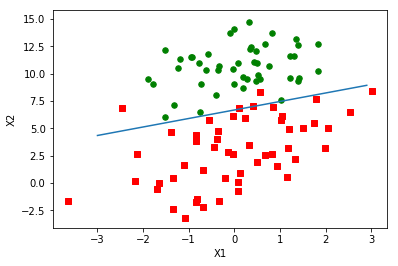

In [43]:
plotBestFit(weights.getA())

## 注意
梯度上升算法在每次更新回归系数时都需要遍历整个数据集，该方法在处理 100 个左右的数据集时尚可，但如果有数十亿样本和成千上万的特征，那么该方法的计算复杂度就太高了。一种改进方法是一次仅用一个样本点来更新回归系数，该方法称为 随机梯度上升算法。由于可以在新样本到来时对分类器进行增量式更新，因而随机梯度上升算法是一个在线学习算法。与 “在线学习” 相对应，一次处理所有数据被称作是 “批处理”。

随机梯度上升算法可以写成如下的伪代码:
```
所有回归系数初始化为 1  
对数据集中每个样本   
        计算该样本的梯度    
        使用 alpha x gradient 更新回归系数值    
返回回归系数值    
```


以下是随机梯度上升算法的实现代码:

In [49]:
# 随机梯度上升
# 梯度上升优化算法在每次更新数据集时都需要遍历整个数据集，计算复杂都较高
# 随机梯度上升一次只用一个样本点来更新回归系数
def stocGradAscent0(dataMatrix, classLabels):
    m,n = shape(dataMatrix)
    alpha = 0.01
    # n*1的矩阵
    # 函数ones创建一个全1的数组
    weights = ones(n)   # 初始化长度为n的数组，元素全部为 1
    for i in range(m):
        # sum(dataMatrix[i]*weights)为了求 f(x)的值， f(x)=a1*x1+b2*x2+..+nn*xn,此处求出的 h 是一个具体的数值，而不是一个矩阵
        h = sigmoid(sum(dataMatrix[i]*weights))
        # print 'dataMatrix[i]===', dataMatrix[i]
        # 计算真实类别与预测类别之间的差值，然后按照该差值调整回归系数
        error = classLabels[i] - h
        # 0.01*(1*1)*(1*n)
#         print(weights, "*"*10 , dataMatrix[i], "*"*10 , error)
        weights = weights + alpha * error * dataMatrix[i]
    return weights

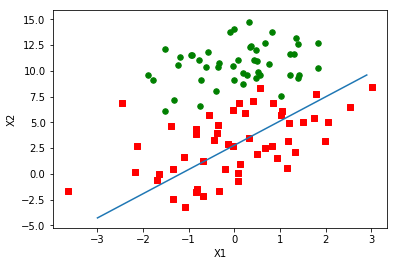

In [50]:
weights=stocGradAscent0(array(a),b)
plotBestFit(weights)

## 4.改进的随机梯度上升算法

程序清单：

In [51]:
# 随机梯度上升算法（随机化）
def stocGradAscent1(dataMatrix, classLabels, numIter=150):
    m,n = shape(dataMatrix)
    weights = ones(n)   # 创建与列数相同的矩阵的系数矩阵，所有的元素都是1
    # 随机梯度, 循环150,观察是否收敛
    for j in range(numIter):
        # [0, 1, 2 .. m-1]
        dataIndex = list(range(m))
        for i in range(m):
            # i和j的不断增大，导致alpha的值不断减少，但是不为0
            alpha = 4/(1.0+j+i)+0.0001    # alpha 会随着迭代不断减小，但永远不会减小到0，因为后边还有一个常数项0.0001
            # 随机产生一个 0～len()之间的一个值
            # random.uniform(x, y) 方法将随机生成下一个实数，它在[x,y]范围内,x是这个范围内的最小值，y是这个范围内的最大值。
            randIndex = int(random.uniform(0,len(dataIndex)))
            # sum(dataMatrix[i]*weights)为了求 f(x)的值， f(x)=a1*x1+b2*x2+..+nn*xn
            h = sigmoid(sum(dataMatrix[randIndex]*weights))
            error = classLabels[randIndex] - h
            # print weights, '__h=%s' % h, '__'*20, alpha, '__'*20, error, '__'*20, dataMatrix[randIndex]
            weights = weights + alpha * error * dataMatrix[randIndex]
            del(dataIndex[randIndex])
    return weights

上面的改进版随机梯度上升算法，我们修改了两处代码。

第一处改进为 alpha 的值。alpha 在每次迭代的时候都会调整，这回缓解上面波动图的数据波动或者高频波动。另外，虽然 alpha 会随着迭代次数不断减少，但永远不会减小到 0，因为我们在计算公式中添加了一个常数项。

第二处修改为 randIndex 更新，这里通过随机选取样本拉来更新回归系数。这种方法将减少周期性的波动。这种方法每次随机从列表中选出一个值，然后从列表中删掉该值（再进行下一次迭代）。

程序运行之后能看到类似于下图的结果图。

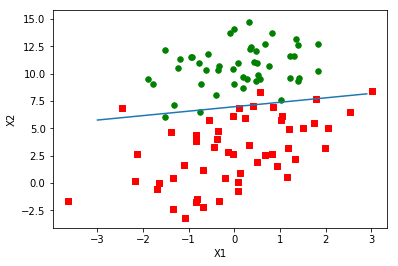

In [52]:
weights=stocGradAscent1(array(a),b)
plotBestFit(weights)

## 5.用Logistic回归进行分类

程序清单：

In [47]:
#sigmoid()分类函数
def classifyVector(inX,weights):
    prob=sigmoid(sum(inX*weights))
    # 值如果大于0.5，归为1.0类
    if(prob>0.5):return 1.0
    else:return 0.0


def colicTest():
    # 打开训练集合
    frTrain=open(r'C:\\Users\Administrator\Desktop\MliA'
                '\MLiA_SourceCode\machinelearninginaction\Ch05\
                  horseColicTraining.txt')
    # 打开测试集合
    frTest=open(r'C:\\Users\Administrator\Desktop\MliA'
                '\MLiA_SourceCode\machinelearninginaction\Ch05\horseColicTest.txt')
    # 初始化训练集和标签的列表
    trainingSet=[]
    trainingLabels=[]
    for line in frTrain.readlines():
        # 对训练集的数据格式化处理
        currLine=line.strip().split('\t')
        lineArr=[]
        for i in range(21):
            # 将每一行的特征数据放到lineArr中
            lineArr.append(float(currLine[i]))
        # 再将lineArr作为列表放到trainingSet中
        trainingSet.append(lineArr)
        # 将标签放到trainingLabels中
        trainingLabels.append(float(currLine[21]))
    # 得到训练集的权重
    trainWeights=stocGraAscent1(array(trainingSet),trainingLabels,500)
    errorCount=0;numTestVec=0.0
    # 对测试集进行测试
    for line in frTest.readlines():
        # 计算测试集的个数
        numTestVec+=1.0
        # 对测试数据进行格式化处理
        currLine=line.strip().split('\t')
        lineArr=[]
        for i in range(21):
            lineArr.append(float(currLine[i]))
        # 如果学习出来的结果和真实结果不一致，则错误数加一
        if(int(classifyVector(array(lineArr),trainWeights))!=int(currLine[21])):
            errorCount+=1
        # 计算错误率
        errorRate=(float(errorCount)/numTestVec)
        print('the error rate of this test is %f'%errorRate)
        return errorRate
# 调用colicTest()函数多次，计算错误率的平均值
def multiTest():
    numTests=10
    errorSum=0.0
    for k in range(numTests):
        errorSum+=colicTest()
    print('after %d iterations the arrange error rate is:%f'
            % (numTests,errorSum/float(numTests)))


## 摘要

1.Logistic回归分析  
2.梯度下降法  
3.代码实现与解释  

## Logistic回归 
逻辑斯特回归（logistic regression）是一种非常经典的分类方法。其用到的分类函数一般为Sigmoid函数，其函数形式为：

$$S(z)=\frac{1}{1+e^{-z}}$$




表示如下：
<img src="https://pic2.zhimg.com/80/v2-876cb2f9e1bc0229245fb3f58ca0451b_hd.jpg",width=400,height=400>


从图中我们可以看到，当z=0时，函数值为0.5。随着z值的增加，对应的函数值将逼近于1；随着z值的减小，函数值将逼近于0。

因此为了实现logistic回归，对于样本，我们可以在每个特征上乘以一个回归系数，然后将所有的结果值相加，将总和带入sigmoid函数中，进而得到一个范围在0~1之间的数值。大于0.5的数据被分到1类，小于0.5的即被分到0类。



## 二分类问题

对于Logistic回归中的二分类问题，当我们给定数据样本x时，其被分到1类和0类的条件概率分别为：

$$P(y=1|x)=\frac{1}{1+e^{-(w*x+b)}}=\frac{e^{(w*x+b)}}{1+e^{(w*x+b)}}$$
$$P(y=0|x)=1-P(y=1|x)=\frac{1}{1+e^{(w*x+b)}}$$

其中，$x\in R^n$是输入，$y\in \{0,1\}$是输出，$w\in R^n$和$b$是参数，$w$称为权重。$w*x$代表$w$和$x$的内积，为了方便我们令$w=(w,b)$，$x=(x,1)$  


那么上式就可改写为：  
$$P(y=1|x)=\frac{1}{1+e^{-(w*x+b)}}=\frac{e^{(w*x)}}{1+e^{(w*x)}}$$
$$P(y=0|x)=1-P(y=1|x)=\frac{1}{1+e^{(w*x)}}$$

## 模型参数估计

在Logistic回归参数学习中，对于给定的训练数据集T=｛(x1,y1),(x2,y2),...(xN,yN)｝，我们用极大似然估计法估计模型参数w，从而得到logistic回归模型。  

设$P(y=1|x)=\pi{(x)}$，那么$P(y=0|x)=1-\pi{(x)}$，那么似然函数为：$\prod_{i=1}^{N}[\pi{(x_i)}]^{y_i}[1-\pi{(x_i)}]^{1-y_i}$

对数似然函数为： 
$$
\begin{aligned} % requires amsmath; align* for no eq. number
L(w) & =\sum_{i=1}^{N}[y_ilog_{\pi(x_i)}+(1-y_i)log(1-\pi(x_i))]\\
   & =\sum_{i=1}^{N}[y_ilog{\frac{\pi(x_i)}{1-\pi(x_i)}}+log(1-\pi(x_i))]\\
   & = \sum_{i=1}^{N}{[y_i(w*x_i)-log(1+e^{w*x})]}
\end{aligned}
$$


当我们对L(w)求得极大值，也就得到了参数w的估计值。

这样，问题就变成了以对数似然估计为目标函数的最优化问题。而我们解决这个问题我们一般采用梯度下降法和拟牛顿法。



## 多分类问题

当然，上述的logistic模型同样可以推广到多分类问题。设Y的取值为｛1，2，3,...K｝，那么回归模型即为：


$$
\begin{aligned}
P(y=k|x) &=\frac{e^(w_i*x)}{1+\sum_{k=1}^{K-1}e^(w_i*x)},k=1,2,\dots,K-1\\
p(y=k|x) &=\frac{1}{1+\sum_{k=1}^{K-1}e^(w_i*x)},k=K
\end{aligned}
$$



## 梯度下降法
梯度下降法可以解决上面对于参数w的优化问题。

梯度下降法是一种迭代算法，通过选取适当的初始值，不断迭代，对参数值不断更新，进行目标函数的极小化，直到收敛。由于负梯度方向是函数值减小最快的方向，所以在迭代的每一步，我们向负梯度方向更新参数值，从而减小函数值。

梯度算法的迭代公式为：

$$
w^{(k+1)}=w^k+\alpha\nabla_{w}f(w^k)
$$

其中：$\alpha$是步长，代表每次移动量的大小，$\nabla_wf(w^k)$是函数的梯度方向，$w^{(k+1)}$是下次更新的值。

同理，梯度上升法，就是向梯度方向移动，以求得函数的极大值。  




## 随机梯度下降法

在实现梯度下降法时，我们发现在进行梯度下降法的回归系数更新时需要遍历整个数据集，如果样本或者特征过多的话，这种方法计算复杂度太高。

有一种改进的方法，就是一次我们只随机用一个样本点来更新回归系数，那么该方法就叫做随机梯度下降法。

这两种算法在下面的代码部分都有实现，读者可以自行参考。



求解回归系数w的方法除了上面提到的梯度下降法，还有拟牛顿法，想要详细了解的同学可以见《统计学习方法》附录B。



上面一部分，我们系统地从分类函数讲到怎么确定优化目标函数，再到怎么解优化目标函数。

至此我们就完成了Logistic回归原理部分的学习。下面是代码部分。
